# Measuring Rotation with 21 cm
The hydrogen 21 cm line is a useful tool for determining the kinematics of gas in a galaxy.  As hydrogen is the most prevelant element in our universe, there will be lots of hydrogen in every galaxy.  It fills every phase of the ISM and is more evenly distributed than the stars.  The 21 cm line is preferred over optical hydrogen emission lines as it does not suffer from extinction caused by dust.  Therefore, the 21 cm line can be used to map a galaxy in it's entirity.  The doppler shift of this line in different parts of the galaxy can then be used to determine the rotation across the radius of the galaxy.

For this project, you will work with a 'spectral cube' of the galaxy NGC7331, pictured below.  I chose this galaxy for a specific reason, to do with measuring rotation.  What do you think that reason is?
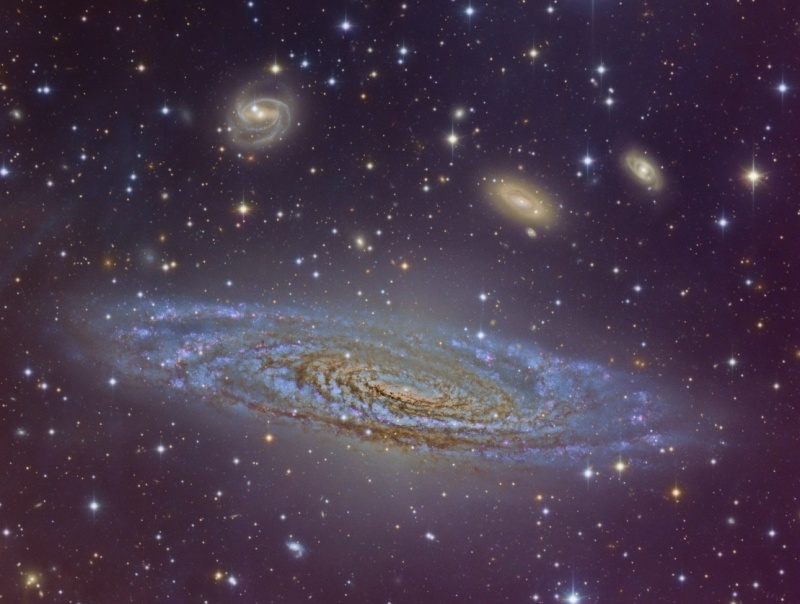

Okay, we can get started!  Let's load some programs first.

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.patches import Ellipse

In [39]:
def elip_ap(gal_xc, gal_yc, width, height, angle, data):
    sum = 0.0
    cos_angle = np.cos(np.radians(180.-angle))
    sin_angle = np.sin(np.radians(180.-angle))
    for x in range(data.shape[0]):
        xc = x - gal_xc
        for y in range(data.shape[1]):
            yc = y - gal_yc

            xct = xc * cos_angle - yc * sin_angle
            yct = xc * sin_angle + yc * cos_angle 

            rad_cc = (xct**2/(width/2.)**2) + (yct**2/(height/2.)**2)
            if rad_cc <= 1.:
                # point in ellipse
                sum = sum+data[x,y] 
            else:
                # point not in ellipse
                sum = sum
    return sum

Now, let's load our data.  We will be working with a spectral cube from the THINGS (The HI Nearby Galaxy Survey) program.  A spectral cube is a 2D spectra of an object.  This means that we've added a new dimension to our images, the dimension of wavelength.  Each pixel is the spectra of that position in the object.  You might want to open the fits file using ds9 and play around with this cube to get a feel for how cubes work.  See the image below for a visulization.  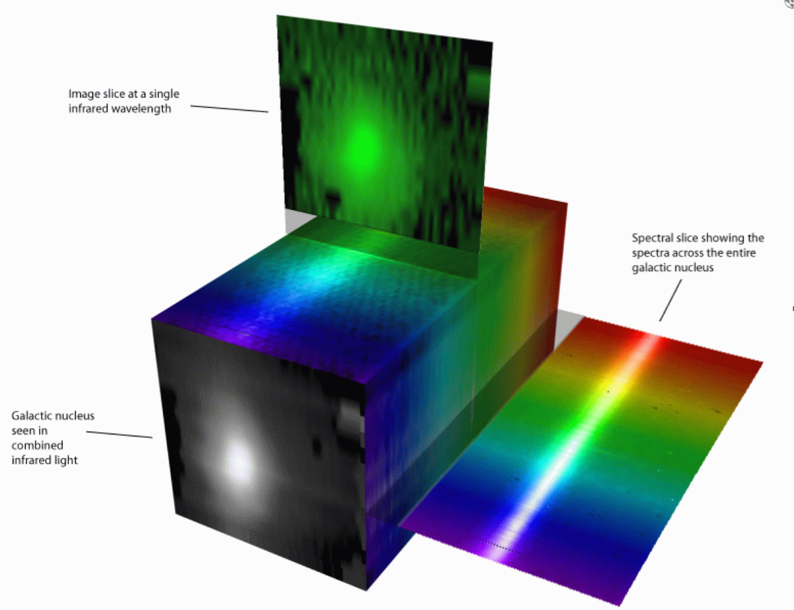

In [9]:
cube = fits.open('NGC_7331_RO_CUBE_THINGS.FITS')
datacube = cube[0].data
hdu = cube[0].header
cube.close()

In [10]:
print(datacube.ndim)
print(datacube.shape)

4
(1, 116, 1024, 1024)


Great!  Above, I've printed the number of dimensions in this image, and how many elements each dimension has.  Don't worry about the first dimension, the other three are the ones we are interested in.  The shape tells us that we have 116 slices in wavelength, and that our image is 1024x1024 pixels.  We can treat each wavelength slice the same as we would any other image!  The code below extracts the flux from an elliptical aperature around the galaxy at the 23 slice in wavelength space, and plots the galaxy.

2.9524491120740795


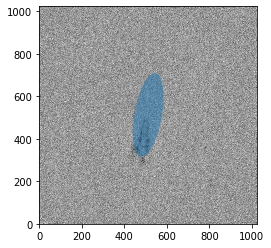

In [42]:
fig, ax = plt.subplots()
theta = 350.0*np.pi/180.0
ellipse = Ellipse((512., 512.), 130., 400., angle=350.0, alpha=0.5)
slice1 = datacube[0][23]
'''
Okay, my elliptical aperture code takes a bit of doing, sorry! 
Here you input the coordinate at the center of the ellipse in x, 
then y, then the width of the ellipse, then the height of the ellipse,
then the angle of the ellipse (in degrees), and finally the data we want to work with.
'''
flux = elip_ap(512, 512, 400, 130, 350, slice1)
ax.add_artist(ellipse)
ax.imshow(slice1, cmap='gray_r', origin='lower')
print(flux)

*A quick note: The WCS info in the header was a bit funky because this is a radio image (21 cm is long...) and I was kinda struggling to get it to work.  That's why I used the EllipticalAperature program instead of SkyApperature program like we usually do.  In this program, the ellipse is placed at a postion in pixel space on the image, as: EllipticalApperature([x_pixel, y_pixel], width, height, theta=rotation_angle_radians).  Sorry for the confusion!

We want to repeat this process for each wavelength slice in this datacube.  Once we do that, we can look at the flux as a function of wavelength to determine the rotation across the galaxy.  Use a for loop to find the flux for the elliptical apperature I created above for each wavelength, and add them to an array.

If you are new to programming, check out this information about for loops https://www.w3schools.com/python/python_for_loops.asp 
and definitely ask for help!  For loops are an incredibly valuable tool in coding!

Once you have all the fluxes for each image slice, plot them vs the slice number.

Sweet.  You should see a double-peaked 21 cm profile (like this one: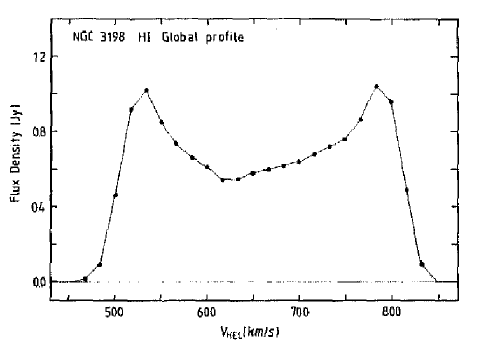
Why do we see this shape (instead of just a single-peak emission line)?  Think doppler shifting!

Before we figure out rotation and gas mass, we will need to get things into the right units.  The slices have already been shifted to take into account the motion of the sun around the galaxy and converted from frequency space to velocity space using the doppler equation.  We just need to use the information in the header to convert from slice number to actual km/s velocity.  I've written the code to do this below

In [7]:
Zr = hdu['CRVAL3'] #velocity value of the reference slice in m/s
slice_0 = hdu['CRPIX3'] #the number of the reference slice
crdelt = hdu['CDELT3'] #the size of the step between each slice

vel = []
for x in range(datacube.shape[1]):
    v = Zr + crdelt*(x-slice_0) #velocity equals reference velocity + seperation from reference point
    v = v/1000. #convert from m/s to km/s
    vel = np.append(vel, v) #add to an array we can use to represent the velocity of each slice


We also need to convert our flux values.  The fluxes in this image are in units of Jansky/beam.  We would like them to be in units of Jansky, which means we need to multiply by the beam size.  For the VLA, the beam size is a circle with a 3 arcsecond radius.  Again, we will need to use data from the header to find the beam size in pixels.  We can then divide our fluxes by the beam size in pixels to get fluxes in Janskys.  

In [10]:
pix_scale = hdu['CDELT2'] #header information with the degrees/pixel
print('The pixel scale is '+ repr(pix_scale) + ' degrees per pixel')

The pixel scale is 0.0004166666768degrees per pixel


Use this scale to write code to find the number of pixels per 3 arcsec beam and divide your flux measurements by this value.

Once you have your properly converted fluxes and velocities, plot flux vs. velocity.

Now you can see the rotation of the galaxy!  The velocity peaks tell you the speed of the spiral arms, while the middle trough shows the speed at which the galaxy is moving away!  Estimate the difference between the central velocity and the peaks to find the speed of the spiral arms and record it in a cell below.

Pretty neat, right?!?!?!  Cubes are AMAZING!